##### **Submitted by:**
#### Hitika Saini (101816050) (3CS3)
#### Tanya (101866008) (3CS3)
#### Jatin (101866020) (3CS3)
##### jjatin_bemba18@thapar.edu
##### 9306744881 (Jatin)

### **Ques:**    Represent **GHZ state** for 2, 3, 4 Qubit circuits and **W-State** for 2, 3 Qubit circuits.

In [1]:
import numpy as np
from qiskit import *

from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from math import pi

provider = IBMQ.load_account()

## **GHZ State** generalization: 
### |GHZ> = **(|0..*(n-times)*..0> + |1..*(n-times)*..1>)/(2^0.5)** or **0.707 * (|0..*(n-times)*..0> + |1..*(n-times)*..1>)**

### 1. For GHZ state for 2 Qubits, i.e.  entangled **(|00> + |11>)/(2)^0.5**  or  **0.707 * (|00> + |11>)**

#### Defining a circuit with 2 Qubits.

In [2]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circ1 = QuantumCircuit(qreg_q, creg_c)

#### For 2 Qubit GHZ State, we need to initially have both the qubits in |0> state.

In [3]:
circ1.reset(qreg_q[0])
circ1.reset(qreg_q[1])

#### Now, we need to apply Hadamard Gate on 1st Qubit in state |0>, which will transform into state (|0> + |1>)/(2)^0.5 or  0.707*(|0> + |1>)

In [4]:
circ1.h(qreg_q[0])

#### Now, we apply C-Not Gate on 1st Qubit, using 2nd Qubit as Control Bit.

In [5]:
circ1.cx(qreg_q[0], qreg_q[1])

#### Our circuit will look like this below.

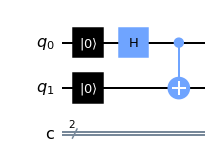

In [6]:
circ1.draw()

#### Now, we check the state of the Qubits.

In [7]:
from qiskit.quantum_info import Statevector

state = Statevector.from_int(0, 2**2)
state = state.evolve(circ1)

state.draw('latex')

<IPython.core.display.Latex object>

#### Clearly, output shows both |00> and |11> states with amplitude 1/2^0.5

#### Now, measuring the Qubits.

In [8]:
circ1.measure(qreg_q[0], creg_c[0])
circ1.measure(qreg_q[1], creg_c[1])

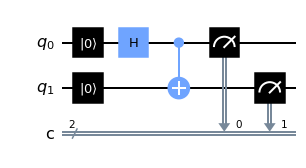

In [9]:
circ1.draw()

#### Now, we run simulations of the circuit with 1024 iterations.

In [10]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circ1, backend, shots=1024)
job.result().get_counts(circ1)

{'11': 504, '00': 520}

#### After running on **Actual IBM computers**, we get output:

#### '00' : 422
#### '01' : 32
#### '10' : 137
#### '11' : 433

#### We can see that we are getting outputs as |01> and |10> as well, which shouldn't happen in an ideal circuit. 
#### There are 169 outputs other than |00> or |11>, which gives approx error of 16.50%.

### 2. For GHZ state for 3 Qubits, i.e. entangled **(|000> + |111>)/(2)^0.5**  or  **0.707 * (|000> + |111>)**

#### Defining a circuit with 3 Qubits.

In [11]:
qreg_q = qiskit.QuantumRegister(3, 'q')
creg_c = qiskit.ClassicalRegister(3, 'c')
circ2 = QuantumCircuit(qreg_q, creg_c)

#### Setting all the Qubits to |0> state.

In [12]:
circ2.reset(qreg_q[0])
circ2.reset(qreg_q[1])
circ2.reset(qreg_q[2])

#### Applying Hadamard Gate to 1st Qubit.

In [13]:
circ2.h(qreg_q[0])

#### Now, we apply C-Not gate on 1st Qubit, with 2nd Qubit as control qubit.

In [14]:
circ2.cx(qreg_q[0], qreg_q[1])

#### Current State of Qubits,

In [15]:
state = Statevector.from_int(0, 2**3)
state = state.evolve(circ2)

state.draw('latex')

<IPython.core.display.Latex object>

#### Again, we apply C-Not gate on 1st Qubit, now with 3rd Qubit as control qubit.

In [16]:
circ2.cx(qreg_q[0], qreg_q[2])

#### Circuit will look this below.

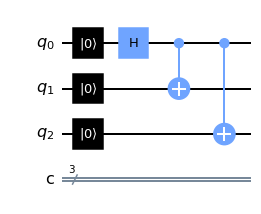

In [17]:
circ2.draw()

#### Now, we check the state of the Qubits.

In [18]:
state = Statevector.from_int(0, 2**3)
state = state.evolve(circ2)

state.draw('latex')

<IPython.core.display.Latex object>

#### Clearly, output shows both |000> and |111> states with amplitude 1/2^0.5

#### Now, measuring the circuit.

In [19]:
circ2.measure(qreg_q[0], creg_c[0])
circ2.measure(qreg_q[1], creg_c[1])
circ2.measure(qreg_q[2], creg_c[2])

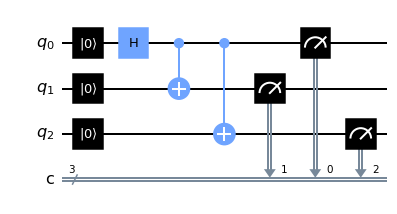

In [20]:
circ2.draw()

#### Now, we run simulations of the circuit with 1024 iterations.

In [21]:
job = execute(circ2, backend, shots=1024)
job.result().get_counts(circ2)

{'000': 479, '111': 545}

#### After running on **Actual IBM computers**, we get output:

#### '000' : 454
#### '001' : 17
#### '010' : 23
#### '011' : 36
#### '100' : 12
#### '101' : 36
#### '110' : 15
#### '111' : 431

#### There are 139 outputs other than |000> or |111>, which gives approx error of 13.57%.

### 3. For GHZ state for 4 Qubits, i.e. entangled **(|0000> + |1111>)/(2)^0.5**  or  **0.707 * (|0000> + |1111>)**

#### Defining a circuit with 4 Qubits.

In [22]:
qreg_q = qiskit.QuantumRegister(4, 'q')
creg_c = qiskit.ClassicalRegister(4, 'c')
circ3 = QuantumCircuit(qreg_q, creg_c)

#### Setting all the Qubits to |0> state.

In [23]:
circ3.reset(qreg_q[0])
circ3.reset(qreg_q[1])
circ3.reset(qreg_q[2])
circ3.reset(qreg_q[3])

#### Applying Hadamard Gate to 1st Qubit.

In [24]:
circ3.h(qreg_q[0])

In [25]:
state = Statevector.from_int(0, 2**4)
state = state.evolve(circ3)

state.draw('latex')

<IPython.core.display.Latex object>

#### Now, we apply C-Not gate on 1st Qubit, now with 2nd Qubit as control qubit.

In [26]:
circ3.cx(qreg_q[0], qreg_q[1])

In [27]:
state = Statevector.from_int(0, 2**4)
state = state.evolve(circ3)

state.draw('latex')

<IPython.core.display.Latex object>

#### Again, we apply C-Not gate on 1st Qubit, now with 3rd Qubit as control qubit.

In [28]:
circ3.cx(qreg_q[0], qreg_q[2])

In [29]:
state = Statevector.from_int(0, 2**4)
state = state.evolve(circ3)

state.draw('latex')

<IPython.core.display.Latex object>

#### Again, we apply C-Not gate on 1st Qubit, now wmith 4th Qubit as control qubit.

In [30]:
circ3.cx(qreg_q[0], qreg_q[3])

#### The circuit will look like below.

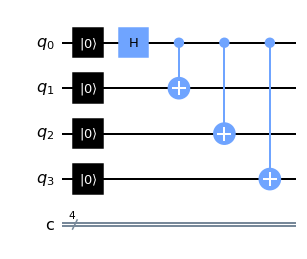

In [31]:
circ3.draw()

#### Now, we check the state of the Qubits.

In [32]:
state = Statevector.from_int(0, 2**4)
state = state.evolve(circ3)

state.draw('latex')

<IPython.core.display.Latex object>

#### We can clearly see the amplitudes of |0000> and |1111> is 0.707.

#### Measuring the Qubits.

In [33]:
circ3.measure(qreg_q[0], creg_c[0])
circ3.measure(qreg_q[1], creg_c[1])
circ3.measure(qreg_q[2], creg_c[2])
circ3.measure(qreg_q[3], creg_c[3])

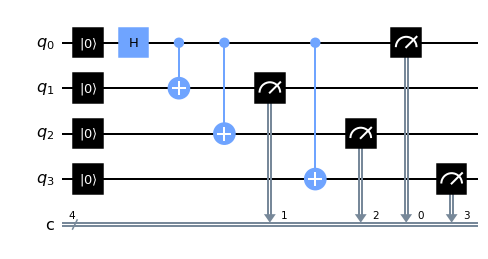

In [34]:
circ3.draw()

#### Now, we run simulations of the circuit with 1024 iterations.

In [35]:
job = execute(circ3, backend, shots=1024)
job.result().get_counts(circ3)

{'1111': 516, '0000': 508}

#### After running on **Actual IBM computers**, we get output:

#### '0000' : 347
#### '0001' : 14
#### '0010' : 23
#### '0011' : 12
#### '0100' : 16
#### '0101' : 22
#### '0110' : 6
#### '0111' : 35
#### '1000' : 14
#### '1001' : 20
#### '1010' : 12
#### '1011' : 38
#### '1100' : 4
#### '1101' : 62
#### '1110' : 13
#### '1111' : 386

#### There are 291 outputs other than |0000> or |1111>, which gives approx error of 28.42%.

## **W-State** generalization:
### |W> = **(|100..0> + |010..0> + |00..01>)/(n^0.5)**

### 1. For W-state for 2 Qubits, i.e. entangled **(|01> + |10>)/(2)^0.5**  or  **0.707 * (|01> + |10>)**

#### Defining a circuit with 2 Qubits.

In [36]:
qreg_q = qiskit.QuantumRegister(2, 'q')
creg_c = qiskit.ClassicalRegister(2, 'c')
circ4 = QuantumCircuit(qreg_q, creg_c)

#### For W-State of 2 Qubits, we initially need 1st Qubit in |0> state and 2nd Qubit in |1> state.

#### Seeting 1st Qubit in |0> state.

In [37]:
circ4.reset(qreg_q[0])

#### As default state of Qubit is |0>, we will apply X-Gate (or Not gate) on 2nd Qubit to make it's state |1>.

In [38]:
circ4.x(qreg_q[1])

#### Now, applying Hadamard Gate to 1st Qubit.

In [39]:
circ4.h(qreg_q[0])

In [40]:
state = Statevector.from_int(0, 2**4)
state = state.evolve(circ4)

state.draw('latex')

<IPython.core.display.Latex object>

#### And applying C-Not Gate to 1st Qubit, with control qubit as 2nd Qubit.

In [41]:
circ4.cx(qreg_q[0], qreg_q[1])

#### The circuit will look like below.

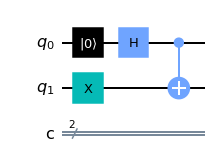

In [42]:
circ4.draw()

#### Now, we check the state of the Qubits.

In [43]:
state = Statevector.from_int(0, 2**2)
state = state.evolve(circ4)

state.draw('latex')

<IPython.core.display.Latex object>

#### We can clearly see the amplitudes of |01> and |10> is 0.707.

#### Now, measuring the Qubits.

In [44]:
circ4.measure(qreg_q[0], creg_c[0])
circ4.measure(qreg_q[1], creg_c[1])

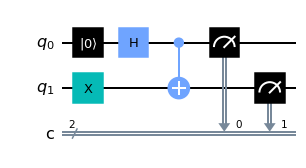

In [45]:
circ4.draw()

#### Now, we run simulations of the circuit with 1024 iterations.

In [46]:
job = execute(circ4, backend, shots=1024)
job.result().get_counts(circ4)

{'01': 522, '10': 502}

#### After running on **Actual IBM computers**, we get output:

#### '00' : 25
#### '01' : 490
#### '10' : 479
#### '11' : 30

#### We can see that we are getting outputs as |00> and |11> as well, which shouldn't happen in an ideal circuit. 
#### There are 55 outputs other than |01> or |10>, which gives approx error of 5.37%.

### 2. For W-state for 3 Qubits, i.e. entangled **(  |001> + |010> + |100>)/(3^0.5)**  or  **0.577*( |001> + |010> + |100>)**

#### Defining a circuit with 3 Qubits.

In [47]:
qreg_q = qiskit.QuantumRegister(3, 'q')
creg_c = qiskit.ClassicalRegister(3, 'c')
circ5 = QuantumCircuit(qreg_q, creg_c)

#### Setting all the Qubits to |0> state.

In [48]:
circ5.reset(qreg_q[0])
circ5.reset(qreg_q[1])
circ5.reset(qreg_q[2])

#### First, we need to apply **Ry Rotation operator Gate** with **Angle of Rotation = 2*arccos(1/3^0.5) or 1.9106332362490184** on the 1st Qubit

In [49]:
circ5.ry(1.9106332362490184, qreg_q[0])

In [50]:
state = Statevector.from_int(0, 2**3)
state = state.evolve(circ5)

state.draw('latex')

<IPython.core.display.Latex object>

#### Now, we can apply Controlled Hadamard Gate on 1st and 2nd Qubits, or in Qiskit circuit we can use Controlled U-Gate with phase pi/2 on 1st and 2nd Qubits.

In [51]:
circ5.cu(pi/2, pi/2, pi/2, pi/2, qreg_q[0], qreg_q[1])

In [52]:
state = Statevector.from_int(0, 2**3)
state = state.evolve(circ5)

state.draw('latex')

<IPython.core.display.Latex object>

#### Now, we apply C-Not Gate on 2nd Qubit, with 3rd Qubit as Control qubit.

In [53]:
circ5.cx(qreg_q[1], qreg_q[2])

#### Now, we apply C-Not Gate on 1st Qubit, with 2nd Qubit as Control qubit.

In [54]:
state = Statevector.from_int(0, 2**3)
state = state.evolve(circ5)

state.draw('latex')

<IPython.core.display.Latex object>

In [55]:
circ5.cx(qreg_q[0], qreg_q[1])

In [56]:
state = Statevector.from_int(0, 2**3)
state = state.evolve(circ5)

state.draw('latex')

<IPython.core.display.Latex object>

#### At last, applying X-gate to 1st Qubit.

In [57]:
circ5.x(qreg_q[0])

#### Circuit will look like below.

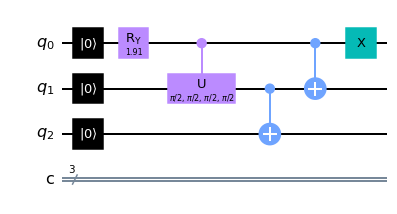

In [58]:
circ5.draw()

#### Getting the State of the Qubits.

In [59]:
state = Statevector.from_int(0, 2**3)
state = state.evolve(circ5)

state.draw('latex')

<IPython.core.display.Latex object>

#### Measuring all the Qubits.

In [60]:
circ5.measure(qreg_q[0], creg_c[0])
circ5.measure(qreg_q[1], creg_c[1])
circ5.measure(qreg_q[2], creg_c[2])

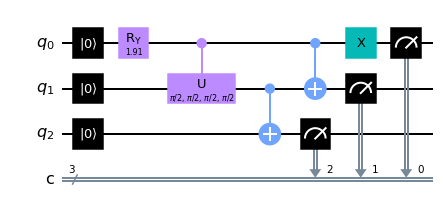

In [61]:
circ5.draw()

#### Now, we run simulations of the circuit with 1024 iterations.

In [62]:
job = execute(circ5, backend, shots=1024)
job.result().get_counts(circ5)

{'010': 328, '100': 352, '001': 344}

#### After running on **Actual IBM computers**, we get output:

#### '000' : 37
#### '001' : 345
#### '010' : 278
#### '011' : 3
#### '100' : 306
#### '101' : 7
#### '110' : 13
#### '111' : 35

#### There are 95 outputs other than |001>, |010> or |100>, which gives approx error of 9.27%.